In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# scalling lib
from sklearn.preprocessing import MinMaxScaler

# train test split
from sklearn.model_selection import train_test_split

# ANN
from tensorflow.keras import Sequential
from keras.layers import Dense

# Accuracy
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("Heart_Disease.csv")

In [3]:
# train test split
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
# scalling
sc=MinMaxScaler()
scaled_Xtrain=sc.fit_transform(X_train)
scaled_Xtest=sc.transform(X_test)

In [5]:
ann=Sequential()
ann.add(Dense(11,activation='relu',input_dim=13))
ann.add(Dense(11,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

In [6]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                154       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________


In [7]:
ann.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
history=ann.fit(scaled_Xtrain,y_train,epochs=40,validation_split=0.2)

Epoch 1/40
7/7 [==============================] - 2s 72ms/step - loss: 0.6802 - accuracy: 0.5440 - val_loss: 0.6758 - val_accuracy: 0.5714
Epoch 2/40
7/7 [==============================] - 0s 12ms/step - loss: 0.6756 - accuracy: 0.5440 - val_loss: 0.6721 - val_accuracy: 0.5714
Epoch 3/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6719 - accuracy: 0.5544 - val_loss: 0.6677 - val_accuracy: 0.5714
Epoch 4/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6679 - accuracy: 0.5699 - val_loss: 0.6630 - val_accuracy: 0.5714
Epoch 5/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6637 - accuracy: 0.5699 - val_loss: 0.6582 - val_accuracy: 0.5918
Epoch 6/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6591 - accuracy: 0.5959 - val_loss: 0.6525 - val_accuracy: 0.5918
Epoch 7/40
7/7 [==============================] - 0s 10ms/step - loss: 0.6541 - accuracy: 0.6062 - val_loss: 0.6456 - val_accuracy: 0.6327
Epoch 8/40
7/7 [===========

In [9]:
y_log=ann.predict(scaled_Xtest)

2/2 [==============================] - 0s 7ms/step


In [10]:
y_pred=np.where(y_log>0.5,1,0)

In [11]:
accuracy_score(y_test,y_pred)

0.8360655737704918

In [12]:
history.history

{'loss': [0.6802048087120056,
  0.6755890250205994,
  0.671941339969635,
  0.6679325103759766,
  0.6636645197868347,
  0.6591467261314392,
  0.654144287109375,
  0.6486267447471619,
  0.6428815126419067,
  0.6370407938957214,
  0.6310257315635681,
  0.6249057054519653,
  0.619154691696167,
  0.6118730306625366,
  0.6035705208778381,
  0.5953224301338196,
  0.5853012800216675,
  0.5777598023414612,
  0.5695196986198425,
  0.5615795850753784,
  0.5529089570045471,
  0.5452401041984558,
  0.5380873680114746,
  0.5307695865631104,
  0.5240433812141418,
  0.5176052451133728,
  0.5110220909118652,
  0.5058823227882385,
  0.5010990500450134,
  0.49817749857902527,
  0.4942515194416046,
  0.4908353090286255,
  0.48608192801475525,
  0.48069390654563904,
  0.4758715331554413,
  0.47411835193634033,
  0.47072893381118774,
  0.46619588136672974,
  0.46180593967437744,
  0.4569070339202881],
 'accuracy': [0.5440414547920227,
  0.5440414547920227,
  0.5544041395187378,
  0.5699481964111328,
  0.569

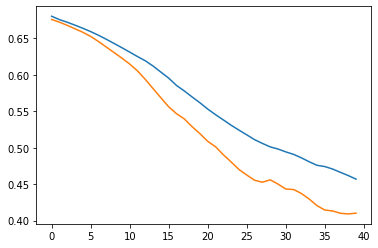

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

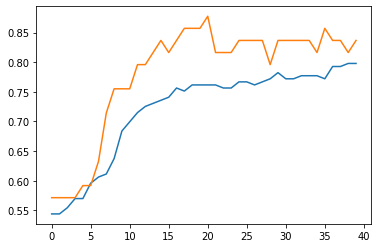

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])